# Trees

### Inorder Traversal
LNR

In [2]:
def inorder(root):
    if not root:
        return    
    inorder(root.left)
    print(root.val)
    inorder(root.right)


### PreOrder Traversal

Parent first then children

In [3]:
def preorder(root):
    if not root:
        return    
    print(root.val)
    preorder(root.left)
    preorder(root.right)

### Post order
Children first then parent
LRN

In [4]:
def postorder(root):
    if not root:
        return    
    postorder(root.left)
    postorder(root.right)
    print(root.val)

In [5]:
def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        #get sorted arr using in order and return the kth element
        def inOrder(node,res):
            if not node:
                return 
            inOrder(node.left,res)
            res.append(node.val)
            inOrder(node.right,res)

            return res

        res = []

        sortedTree = inOrder(root,res)
        print(sortedTree)
        return sortedTree[k-1]

NameError: name 'Optional' is not defined

#### Invert Tree
1) swap left and right ( use temp variable to store left to then later assign to right)
2) recursively call functtion on left and right
3) return root


In [ ]:
def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:

        if not root:
            return 
        tmp = root.left
        root.left = root.right
        root.right = tmp

        self.invertTree(root.left)
        self.invertTree(root.right)

        return root

## Max depth of Tree

Recursive dfs approach
1) if root is none return 0
2) get maximum of left and right subtree

In [ ]:
#DFS recursion 
def maxDepth(self,root):
    if not root:
        return 0
    return 1 + max(self.maxDepth(root.left), self.maxDepth(root.right))

#for every tree it returs the max depth of each subtree and adds 1 to it

### BFS 
Level by level traversal of tree

1) create a queue
2) store root as first element in queue
3) while queue is not empty
4) pop first element in queue
5) add left and right children to queue
6) increment depth by 1
7) return depth

In [ ]:
def maxDepth(self,root):
    if not root:
        return 0
    
    level = 0
    q = deque([root])
    
    while q:
        for i in range(len(q)): #for every level
            #add the next level to the queue
            node = q.popleft()
            #adding children if they are there
            if node.left :
                q.append(node.left)
            if node.right:
                q.append(node.right)
        level += 1
    return level
    

### Iterative DFS (pre order(parent- first))
1) visit node
2) add to stack, proccess it and pop it 
3) add right and left children to stack
4) repeat until stack is empty

In [ ]:
def maxDepth(self,root):
    if not root:
        return 0
    
    res = 1
    stack = [[root,1]]
    while stack: 
        node,depth = stack.pop() #popping both values, initally root and depth 1
        
        if node: #possible the node can be null so we check
            res = max(res,depth)
            stack.append([node.left,depth+1])
            stack.append([node.left,depth+1])
    return res

### Diameter of Binary Tree
get diameter from bottom up 

In [ ]:
def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        #get depth of right and left return max of the sum 
        
        res = [0] #global variable (used in function and outside)

        def dfs(root):
            #base case
            if not root:
                return -1 #height for a null tree

            left = dfs(root.left) #find height of left subtree
            right = dfs(root.right) #height of right subtree

            res[0] = max(res[0],2 + left + right) #diameter of current roor 

            return 1 + max(left,right)

        dfs(root)
        return res[0] 
        

### Balanced Binary Tree
A height-balanced binary tree is a binary tree in which the depth of the two subtrees of every node never differs by more than one.

starto from bottom of tree and recursively check if each node is balanced
while checking if node is balanced get height of that subtree
once in parent node compare those subtree's heights, saving the recursive call of getting height of subtree
height of subtree is 1 + max of left and right subtree

for every subtree teturn [t/f,height]

In [6]:
def isBalanced(self,root):
    def dfs(root):
        if not root:
            return [True,0]
        
        left = dfs(root.left)
        right= dfs(root.right)
        
        #from the root node if its balanced 
        balance = left[0] and right[0] and abs(left[1] - right[1]) <= 1
        
        return [balance, 1 + max(left[1], right[1])]
    
    return dfs(root)[0]

### Branch Sums 
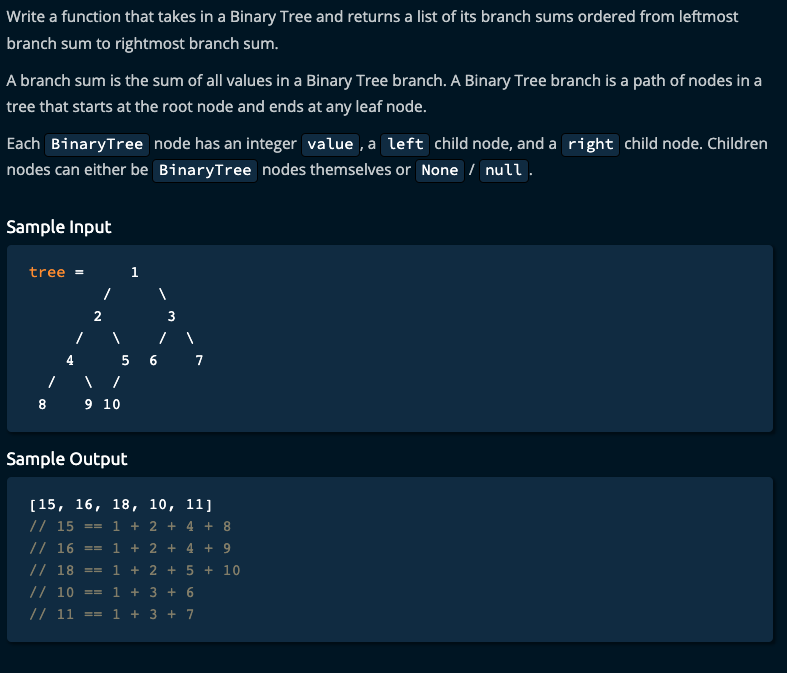


In [ ]:
def branchSUm(root):
    sums = []
    calculateBranchSum(root,0,sums)
    return sums

def calculateBranchSum(node,runningSum,sums):
    #check if node has children
    if not node:
        return
    newSum = runningSum + node.value
    if node.left is None and node.right is None: #leaf 
        sums.append(newSum)
        return
    calculateBranchSum(node.left,newSum, sums)
    calculateBranchSum(node.right,newSum, sums)

In [ ]:
# This is an input class. Do not edit.
class BinaryTree:
    def __init__(self, value, left=None, right=None, parent=None):
        self.value = value
        self.left = left
        self.right = right
        self.parent = parent


def findSuccessor(tree, node):
    # Write your code here.
    #return given nodes succesor 
    #succesor is the node immeddietly after in inorder traversal 
    res = []
    res = inOrder(tree,res)
    print(res)
    
    for i ,orderNode in enumerate(res):
        if orderNode == node:
            print("im in ")
            if i == len(res) - 1:
                return None
            return res[i + 1]

    
def inOrder(node,res):
    if not node:
        return res
    inOrder(node.left,res)
    res.append(node)
    inOrder(node.right,res)

    return res
    


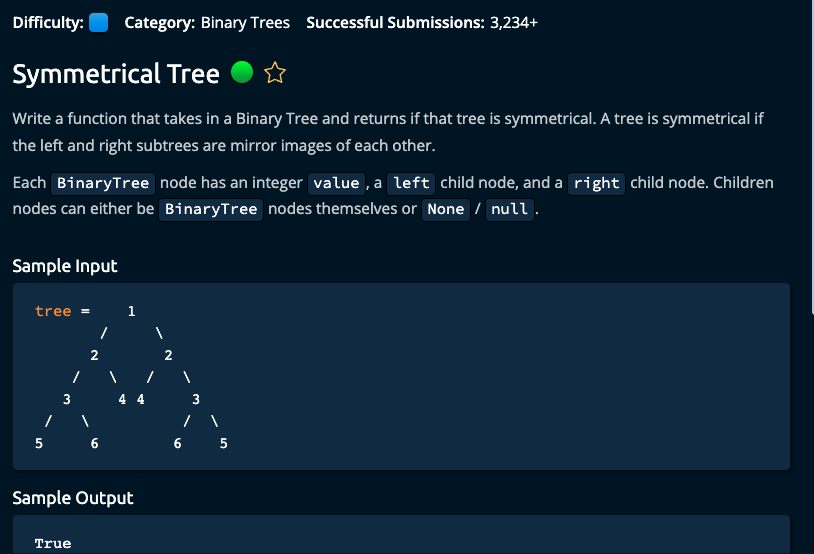

In [ ]:
# This is an input class. Do not edit.
class BinaryTree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right
#root node does not matter 
#checking if each subtree is mirrored image of eachother
#check if root ahve same value and if left and right values are flipped 

#dfs in both subtrees

def symmetricalTree(tree):
    return mirrored(tree.left,tree.right)

def mirrored(left,right):
    if left is not None and right is not None and left.value == right.value:
        return mirrored(left.left,right.right) and mirrored(left.right,right.left)

    return left == right 


In [ ]:
# This is an input class. Do not edit.
class BinaryTree:
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right


def symmetricalTree(tree):
    arr = [] 
    inOrder(tree, arr)
    
    return arr == arr[::-1]

def inOrder(tree,arr):
    if tree is None:
        return 
    inOrder(tree.left,arr)
    arr.append(tree.value)
    inOrder(tree.right, arr)


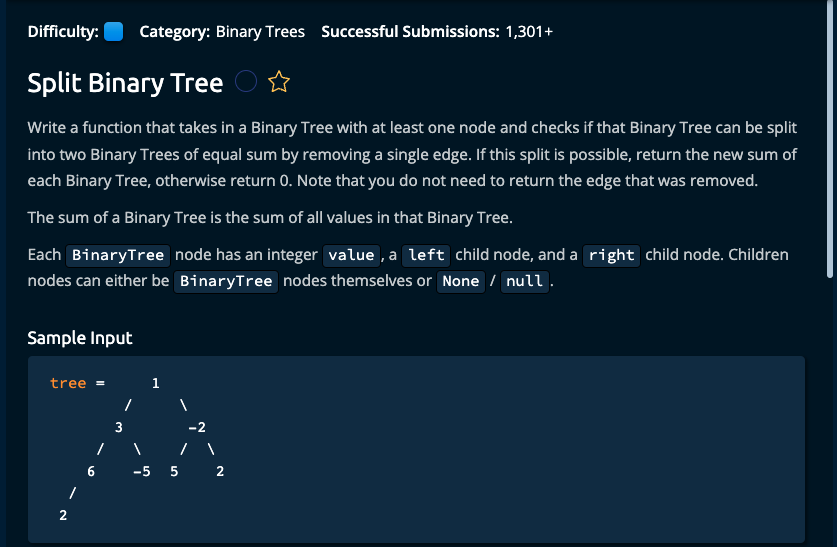

Desired sum for both trees is the total sum of the tree divided by 2 
Startr from the bottom and calulate the sum of each node going up


In [ ]:
def sameTree(self, p, q):
    #base cases 
    if not p and not q: #both are null
        return True
    if not p or not q: #one of them is null  
        return False
    if p.val != q.val:
        return False
    
    return (self.isSameTree(p.left, q.left) and self.isSameTree(p.right,q.right))

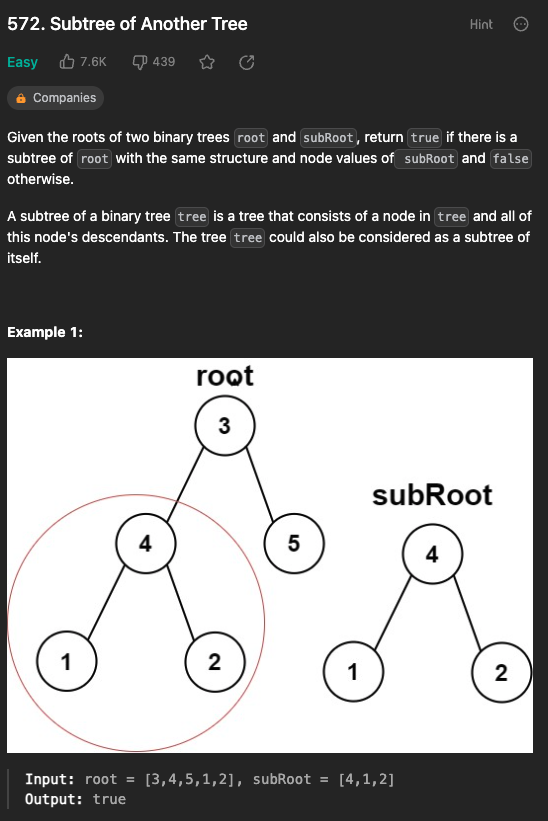

for every single node compare subtree to the other tree
for every node run the sametree function
if the same tree function returns true then return true

In [ ]:
def isSubtree(self,s,t):
    #edge casse---. if t is empty the other tree is automatically a subtree
    if not t:
        return True
    if not s:
        return False
    if self.sameTree(s,t):
        return True
    #recursive call compare t to the subtrees of s
    return (self.isSubtree(s.left,t) or self.isSubtree(s.right,t))
    
def sameTree(self,s,t):
    if not s and not t: #both are empty dso same tree
        return True
    if s and t and s.val == t.val: #if both are none empty
        #compare left and right subtree of s and t
        return (self.sameTree(s.left,t.left)and 
        self.sameTree(s.right,t.right))
    
    #if neither of the statemetns execute
    return False #one tree is empty while the other has a vlue 
    
        

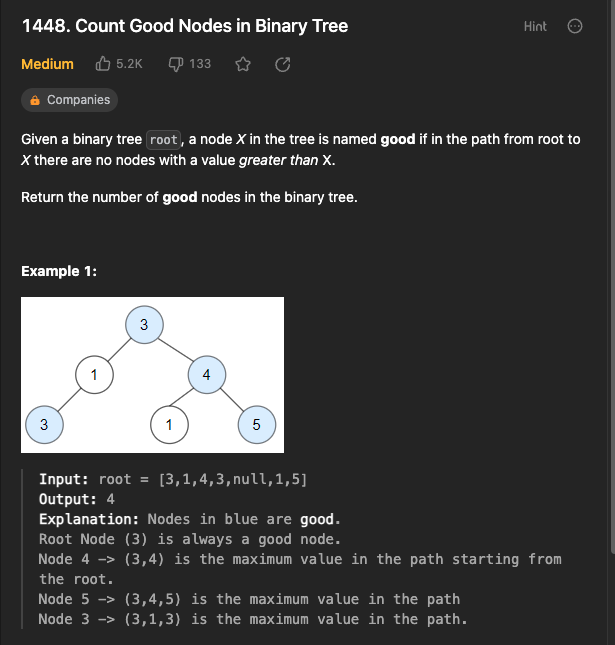

In [ ]:
#use preorder (nlr)
#pass in the max value to the next node to compare it 
#update max value
#from root 1 + left + right ( 1 + 1 + 2)

class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        
        def dfs(node,maxVal):
            if not node:
                return 0
            #now we have a node that is not empty 
            
            #procces node 
            res = 1  if node.val >= maxVal else 0 
            maxVal = max(maxVal,node.val)
            
            #traverse left and right
            #count nukmber of goodNodes in left and right subtree 
            res += dfs(node.left,maxVal)
            res += dfs(node.right,maxVal)

            return res
        
        return dfs(root,root.val)

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None


class Solution:
    def levelOrder(self, root: TreeNode) -> List[List[int]]:
        res = []
        q = collections.deque()
        if root:
            q.append(root)

        while q:
            val = []

            for i in range(len(q)):
                node = q.popleft()
                val.append(node.val)
                if node.left:
                    q.append(node.left)
                if node.right:
                    q.append(node.right)
            res.append(val)
        return res


In [1]:
def largestValues(root):
    if not root:
        return [] 
    res =  [] 
    q = deque([root])
    while q:
        row_max = q[0].val
        length = len(q) 
        for _ in range(length):
            node = q.popleft()
            row_max = max(row_max,node.val)
            if node.left: 
                q.append(node.left) 
            if node.right: 
                q.append(node.right)
        res.append(row_max)
        
    return res
            
        

SyntaxError: incomplete input (2229708737.py, line 1)